<a href="https://colab.research.google.com/github/ips610/UML501-Machine-Learning-Course-TIET/blob/main/UML501_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import missingno as ms
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/USA_Housing.csv')
df1.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [ ]:
df1.isna().any()

,0
Avg. Area Income,False
Avg. Area House Age,False
Avg. Area Number of Rooms,False
Avg. Area Number of Bedrooms,False
Area Population,False
Price,False


<Axes: >

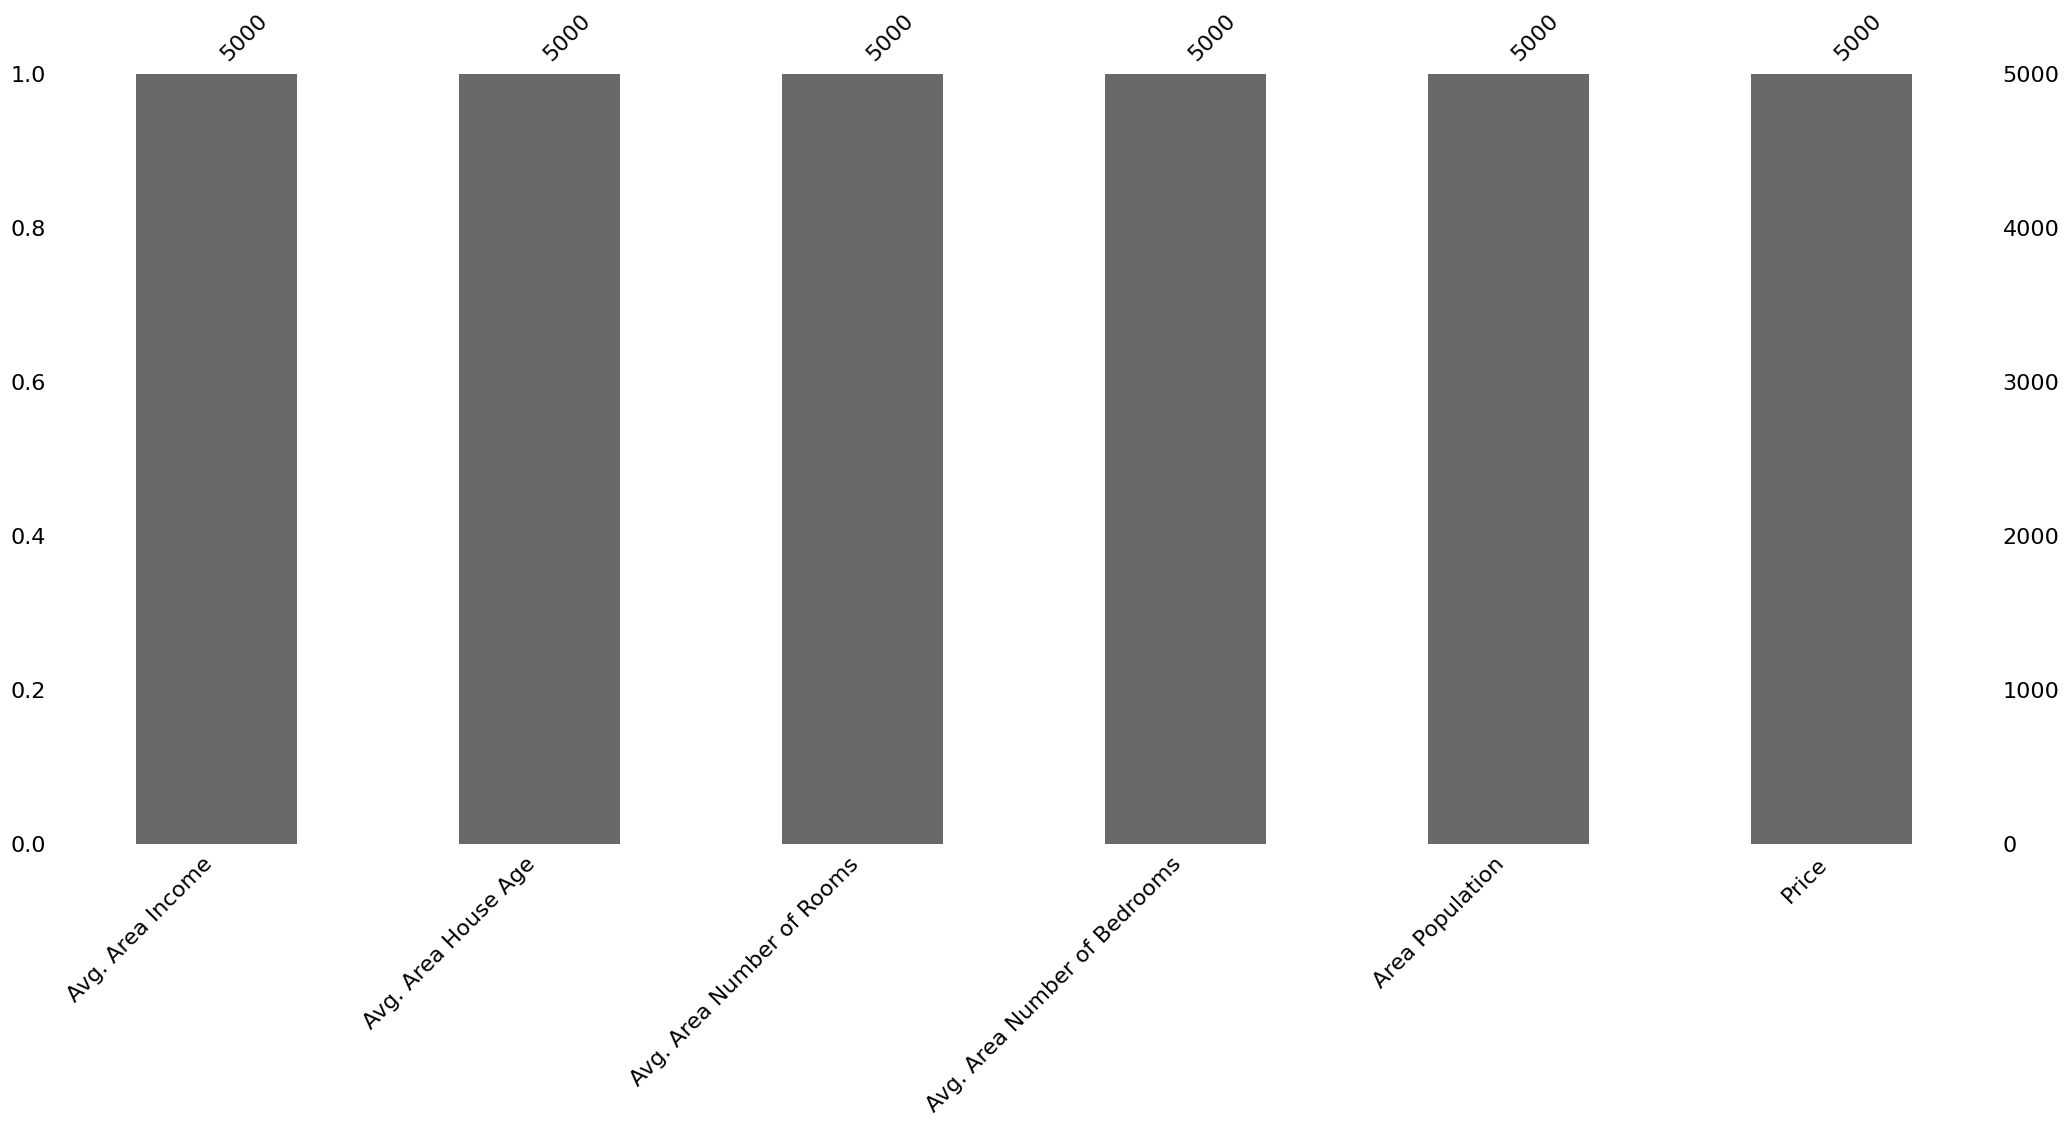

In [ ]:
ms.bar(df1)

<Axes: >

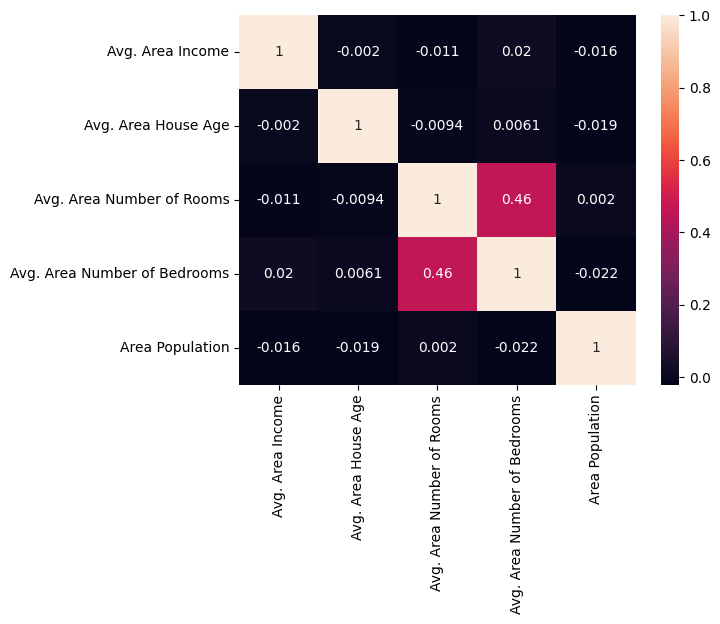

In [ ]:
sns.heatmap(df1.iloc[:,0:5].corr(),annot=True)

In [ ]:
X=df1.iloc[:,0:5]
Y=df1.iloc[:,5]
Y=np.array(Y)
Y=Y.reshape(-1,1)

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled= np.insert(X_scaled, 0, values=1, axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [ ]:
A=X_train.T.dot(X_train)
B=np.linalg.inv(A)
C=B.dot(X_train.T)
beta=C.dot(y_train)
print(beta)

[[1231278.63687691]
 [ 230464.52520478]
 [ 164159.19982569]
 [ 120514.71328324]
 [   2913.62424674]
 [ 151019.35865134]]


In [ ]:
y_predict=X_test.dot(beta)
print(y_predict)

[[1308536.13611172]
 [1237122.72747115]
 [1243835.6280953 ]
 ...
 [1457119.79300222]
 [1483428.9529654 ]
 [1047510.59741982]]


In [ ]:
error=y_test-y_predict
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
mean_square_error=sum_square_error/len(y_predict)
print(mean_square_error)
rms_error=np.sqrt(mean_square_error)
print(rms_error)
y_mean=np.mean(y_test)
total_variance=np.sum((y_test-y_mean)**2)
print(1-sum_square_error/total_variance)

10068422549.495707
100341.52953536091
0.9146818498916266
